In [3]:
import numpy as np
import matplotlib.pyplot as plt
# import keras
import random
import cv2
import requests

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dropout
from keras.models import Model
from PIL import Image

In [4]:
np.random.seed(0)

In [5]:
#loading the dataset
(X_train, y_train), (X_test, y_test)= mnist.load_data()

#Debugging stements
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."

11493376/11490434 [==============================] - 50s 4us/step


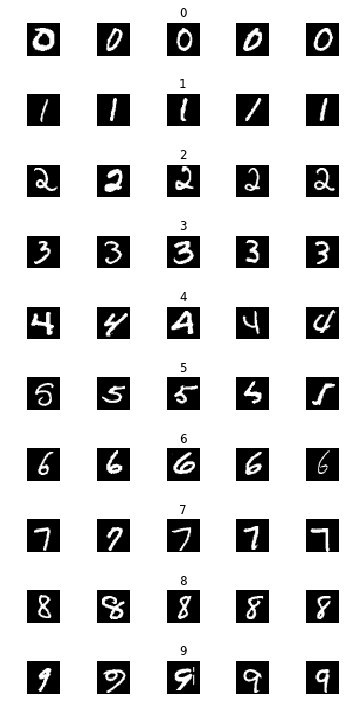

In [6]:
num_of_samples=[]
 
cols = 5
num_classes = 10
# Shows randomly parts of the training dataset

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()
 
for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))


[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


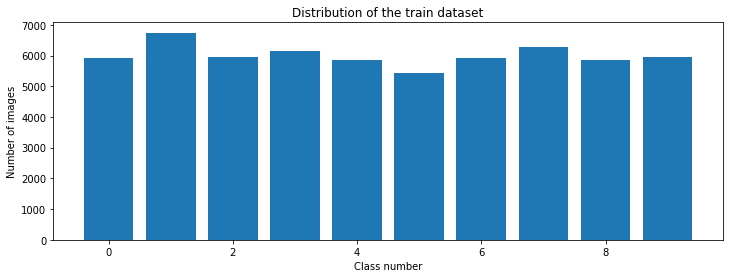

In [7]:
# Shows the distribution of the data

print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [8]:
# Adding depth to our data
X_train = X_train.reshape(60000, 28, 28, 1) #depth of grayscale images is 1
X_test = X_test.reshape(10000, 28, 28, 1)

# Taking the data into a “binary“ format
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Normalising the data
X_train = X_train/255
X_test = X_test/255

In [9]:
# System Architecture of a LeNet model based Convolutional Neural Network
# to decrase overfitting we add a dropout layer

def create_model():  
    model = Sequential()
    model.add(Conv2D(filters=30, kernel_size=(5,5), input_shape=(28,28,1), activation='relu', strides=1))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters=15, kernel_size=(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(lr= 0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [10]:
model = create_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               188000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
__________

In [11]:
history = model.fit(x=X_train, y=y_train,epochs=10, validation_split=0.1, batch_size=400,verbose=1, shuffle=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 36s 671us/step - loss: 0.2549 - acc: 0.9184 - val_loss: 0.0473 - val_acc: 0.9852
Epoch 2/10
54000/54000 [==============================] - 45s 827us/step - loss: 0.0726 - acc: 0.9776 - val_loss: 0.0416 - val_acc: 0.9872
Epoch 3/10
54000/54000 [==============================] - 52s 970us/step - loss: 0.0596 - acc: 0.9813 - val_loss: 0.0524 - val_acc: 0.9843
Epoch 4/10
54000/54000 [==============================] - 48s 897us/step - loss: 0.0510 - acc: 0.9838 - val_loss: 0.0356 - val_acc: 0.9905
Epoch 5/10
54000/54000 [==============================] - 45s 830us/step - loss: 0.0466 - acc: 0.9855 - val_loss: 0.0438 - val_acc: 0.9885
Epoch 6/10
54000/54000 [==============================] - 45s 840us/step - loss: 0.0436 - acc: 0.9861 - val_loss: 0.0400 - val_acc: 0.9890
Epoch 7/10
54000/54000 [==============================] - 38s 707us/step - loss: 0.0393 - acc: 0.9877 - val_loss: 0.0

Text(0.5, 0, 'epoch')

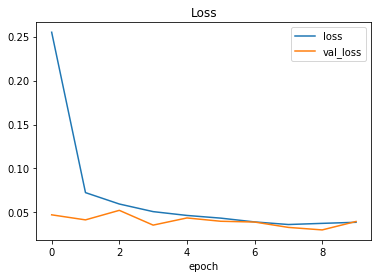

In [12]:
# Tracking the progress of the model

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
 

Text(0.5, 0, 'epoch')

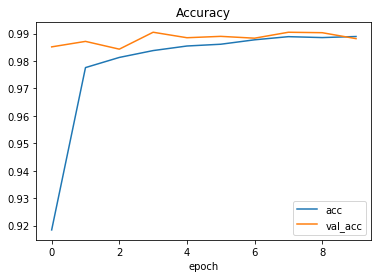

In [13]:
# Tracking the progress of the model

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [22]:
score = model.evaluate(X_test, y_test, verbose=0)

print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.037843794238827194
Test accuracy: 0.9885
